# Normal lunges V/S Abnormal lungs

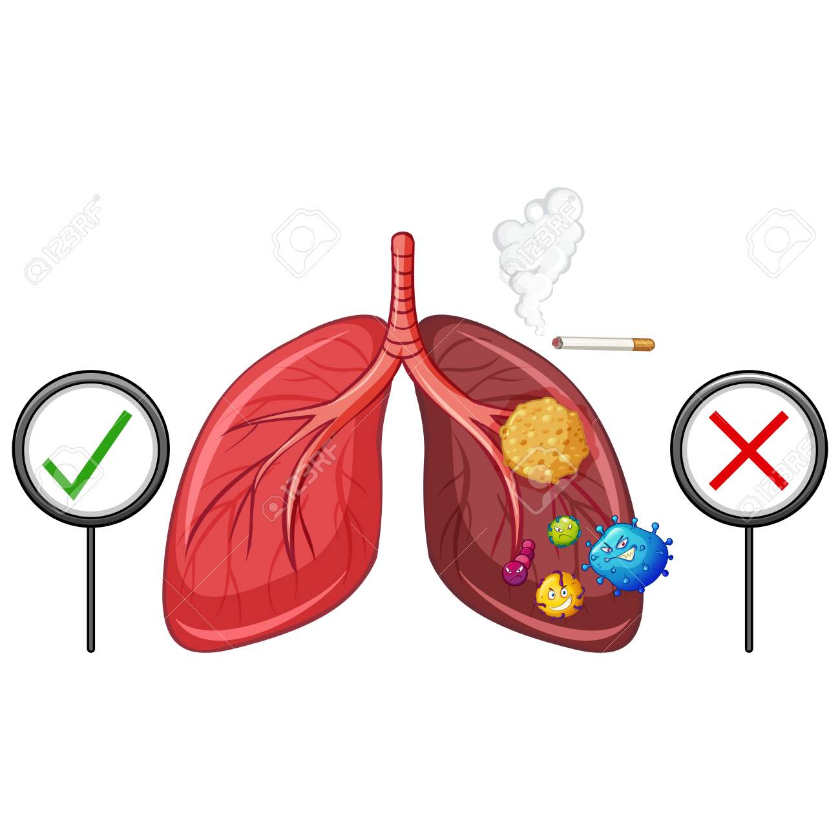

In [46]:
library(EBImage)

img = readImage("https://previews.123rf.com/images/blueringmedia/blueringmedia1802/blueringmedia180200008/96116752-diagram-showing-healthy-and-unhealthy-lungs-illustration.jpg")
display(img, method = "raster")

In [104]:
library(tidyverse)

file_path <- fs::dir_ls("../input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/")

# extracting txt files only to list 

#list_of_files
#store the reading data
Data_store <-list()

list_of_files <- list.files(path = "../input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/", 
                            recursive = TRUE,
                            pattern = "\\.txt$", 
                            full.names = TRUE)
for(i in seq_along(list_of_files)){
    X <- list_of_files[i]
    Data_store[[i]] <- read.table(file = X)    
}



## Reading the data into one sheet
### Reading the txt files

In [105]:
Single_data_store <- do.call("rbind", lapply(Data_store, as.data.frame))

In [106]:
res <- list()
for(i in seq_along(list_of_files)){
    res[i] <- as.numeric(gsub(".*?([0-9]+).*", "\\1",list_of_files[i]))
}


In [107]:
number_of_rows <- list()
z = 0
for(z in 1:920){
    number_of_rows[z]<-NROW(Data_store[[z]])
    }

In [108]:
file.remove("./PatientID.txt")
for(i in seq_along(list_of_files)){
    Z <- res[[i]]
    num <- number_of_rows[[i]]
    for(j in seq(from=1, to=num, by=1))
    {   
        textfile=file.path("./PatientID.txt");
        printer = file(textfile,"a+");
        write(c(Z),textfile,append = TRUE);
        close(printer)
    }
}

[1] TRUE

In [109]:
PID_store <- read.table(file = './PatientID.txt') 
NROW(PID_store) 

[1] 6898

In [110]:
Single_data_store

V1,V2,V3,V4
<dbl>,<dbl>,<int>,<int>
0.036,0.579,0,0
0.579,2.450,0,0
2.450,3.893,0,0
3.893,5.793,0,0
5.793,7.521,0,0
7.521,9.279,0,0
9.279,11.150,0,0
11.150,13.036,0,0
13.036,14.721,0,0


In [114]:
# Normal - 0 or Abnormal -1

Single_data_store <- Single_data_store%>%
select(V1,V2,V3,V4)%>%
mutate(V2-V1)

for(i in 1:6898){
    if(Single_data_store$V3[[i]] == 1){
        Single_data_store$V6[[i]] = 1
    }
    else if(Single_data_store$V4[[i]] == 1){
        Single_data_store$V6[[i]] = 1
    }
    else{
        Single_data_store$V6[[i]] = 0
    }
}
Single_data_store

V1,V2,V3,V4,V2 - V1,V6
<dbl>,<dbl>,<int>,<int>,<dbl>,<list>
0.036,0.579,0,0,0.543,0
0.579,2.450,0,0,1.871,0
2.450,3.893,0,0,1.443,0
3.893,5.793,0,0,1.900,0
5.793,7.521,0,0,1.728,0
7.521,9.279,0,0,1.758,0
9.279,11.150,0,0,1.871,0
11.150,13.036,0,0,1.886,0
13.036,14.721,0,0,1.685,0


In [115]:
Single_data_store <- setNames(Single_data_store, c("Start_rec","End_rec","crackles","wheezes","Start_End","Normal_VS_Abnormal"))


In [116]:
New_1 <- cbind(x = Single_data_store, y = PID_store)

### Reading the WAV files

In [117]:
file.remove("./Freq.txt")
fileConn <- file("./Freq.txt")

[1] TRUE

In [118]:
library(seewave)
library(tuneR)
library(reshape2)
library(dplyr)


list_of_files_WAV <- list.files(path = "../input/respiratory-sound-database/Respiratory_Sound_Database/Respiratory_Sound_Database/audio_and_txt_files/", 
                            recursive = TRUE,
                            pattern = "\\.wav$", 
                            full.names = TRUE)
freq <- list()
for(i in seq_along(list_of_files_WAV)){
    Y <- list_of_files_WAV[i]
    wav = readWave(Y)
    wave = spectro(wav, plot = F)
    freq = wave$freq
    max = max(freq)
    num <- number_of_rows[[i]]
    for(j in seq(from=1, to=num, by=1))
    {  
        textfile=file.path("./Freq.txt");
        printer = file(textfile,"a+");
        write(c(max),textfile,append = TRUE);
        close(printer)
    
    }
    
 }




In [119]:
Freq_store <- read.table(file = './Freq.txt') 
NROW(Freq_store) 

[1] 6898

In [120]:
New_1 <- cbind(x = New_1, y = Freq_store)

In [121]:
New_1<-setNames(New_1 , c("Start_rec","End_rec","crackles","wheezes","Start_End","Normal_VS_Abnormal","ID","Freq"))

In [122]:
New_1

Start_rec,End_rec,crackles,wheezes,Start_End,Normal_VS_Abnormal,ID,Freq
<dbl>,<dbl>,<int>,<int>,<dbl>,<list>,<int>,<dbl>
0.036,0.579,0,0,0.543,0,101,21.96387
0.579,2.450,0,0,1.871,0,101,21.96387
2.450,3.893,0,0,1.443,0,101,21.96387
3.893,5.793,0,0,1.900,0,101,21.96387
5.793,7.521,0,0,1.728,0,101,21.96387
7.521,9.279,0,0,1.758,0,101,21.96387
9.279,11.150,0,0,1.871,0,101,21.96387
11.150,13.036,0,0,1.886,0,101,21.96387
13.036,14.721,0,0,1.685,0,101,21.96387


In [123]:
countainer <- read.table('../input/respiratory-sound-database/demographic_info.txt')

In [124]:
Countainer <- countainer%>%
group_by(V3)%>%
select(V1,V2,V3)

Countainer_one <-setNames(Countainer, c("ID", "Age","Sex"))

for(i in 1:nrow(New_1)){
    for(j in 1:nrow(Countainer_one)){
        if(New_1$ID[[i]] == Countainer_one$ID[j]){
            if(Countainer_one$ID[j] == 223){
                New_1$Sex[[i]]= 'M'
                New_1$Age[[i]]= 50
                }  
            else{
            New_1$Sex[[i]]= Countainer_one$Sex[j]
            New_1$Age[[i]]= Countainer_one$Age[j]
                }
     }
    else{
        return
    }
}
    }


In [125]:
New_1 <- New_1 %>%
relocate(Normal_VS_Abnormal, .after = Age)


In [126]:
X_df <- New_1[5:10] 
X_df$Sex [X_df$Sex == "M"] <- 1
X_df$Sex [X_df$Sex == "F"] <- 0
X_df$Sex <- as.integer(X_df$Sex)


In [127]:
X_df$Start_End<-as.numeric(X_df$Start_End)
X_df$Sex<-as.numeric(X_df$Sex)
X_df$Age<-as.numeric(X_df$Age)
X_df$ID<-as.numeric(X_df$ID)
X_df$Freq<-as.numeric(X_df$Freq)

In [128]:
X_df$Normal_VS_Abnormal = factor(X_df$Normal_VS_Abnormal, levels = c(0, 1))

In [129]:
library(caTools)
set.seed(123)
split = sample.split(X_df$Normal_VS_Abnormal, SplitRatio = 0.75)
training_set = subset(X_df, split == TRUE)
test_set = subset(X_df, split == FALSE)


In [130]:
training_set[-6] = scale(training_set[-6])
test_set[-6] = scale(test_set[-6])

In [131]:
library(e1071)
classifier_svm = svm(formula = Normal_VS_Abnormal ~ .,
                data = training_set,
                type = 'C-classification',
                kernel = 'radial')

In [132]:
library(randomForest)
classifier_randomForest = randomForest(x = training_set[-6],
                         y = training_set$Normal_VS_Abnormal,
                         ntree = 10)

In [133]:
y_pred_svm = predict(classifier_svm, newdata = test_set[-6])

In [134]:
y_pred_randomForest = predict(classifier_randomForest, newdata = test_set[-6])

In [135]:
cm_rf = table(test_set[, 6], y_pred_randomForest)
cm_svm = table(test_set[, 6], y_pred_svm)

In [136]:
cm_svm

   y_pred_svm
      0   1
  0 600 310
  1 217 597

In [137]:
cm_rf

   y_pred_randomForest
      0   1
  0 678 232
  1 229 585